# PCA Dimension reduction

In [1]:
#https://builtin.com/data-science/step-step-explanation-principal-component-analysis
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#data
x=np.matrix([[-2,3,-1],[-1,1,0],[2,-1,-1],[1,-3,2]])
print(x)

[[-2  3 -1]
 [-1  1  0]
 [ 2 -1 -1]
 [ 1 -3  2]]


## STEP 1: STANDARDIZATION

In [3]:
#Mean of each variable
x_mean = x.mean(0)
print(x_mean)

[[0. 0. 0.]]


In [4]:
x_std = np.std(x, axis=0)
print(x_std)    

[[1.58113883 2.23606798 1.22474487]]


In [5]:
x_mean[0,0]

0.0

In [6]:
z = np.zeros(shape=(4,3))
#print(z)
for i in range(4):
    #print(x[i])
    for j in range(3):
        #print(x[i,j])
        temp = ((x[i,j] - x_mean[0,j]))#/x_std[0,j])
        z[i,j] = temp
        #print(temp)
        
print(z)

[[-2.  3. -1.]
 [-1.  1.  0.]
 [ 2. -1. -1.]
 [ 1. -3.  2.]]


## STEP 2: COVARIANCE MATRIX COMPUTATION

In [7]:
dim = 3 #3 features
cov_m = np.cov(z, rowvar=False, bias=True)
print(cov_m)

[[ 2.5 -3.   0.5]
 [-3.   5.  -2. ]
 [ 0.5 -2.   1.5]]


In [8]:
dim = 3 #3 features
corr_m = np.corrcoef(z, rowvar=False)
print(corr_m)

[[ 1.         -0.84852814  0.25819889]
 [-0.84852814  1.         -0.73029674]
 [ 0.25819889 -0.73029674  1.        ]]


## STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS

In [9]:
w, v = np.linalg.eig(cov_m)
print(w)
print("\n")
print(v)

[7.62249900e+00 1.37750100e+00 6.85963375e-16]


[[-0.50325864  0.64295988  0.57735027]
 [ 0.80844891  0.11435482  0.57735027]
 [-0.30519027 -0.75731471  0.57735027]]


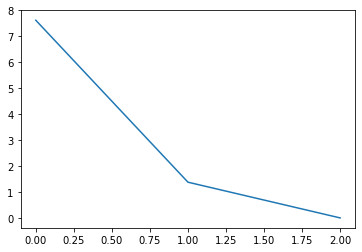

In [10]:
plt.plot(w)

In [11]:
#Amount in % of "informations" by eigenvector
print(w[0]/(np.sum(w))) #84%
print(w[1]/(np.sum(w))) #15%
print(w[2]/(np.sum(w)))

0.8469443332443555
0.15305566675564458
7.621815276143216e-17


In [12]:
pca = v[0:2]
print(pca)

[[-0.50325864  0.64295988  0.57735027]
 [ 0.80844891  0.11435482  0.57735027]]


## LAST STEP : RECAST THE DATA ALONG THE PRINCIPAL COMPONENTS AXES

In [13]:
print(np.shape(pca))
print(np.shape(np.transpose(z)))

(2, 3)
(3, 4)


In [14]:
dataset_final = np.matmul(pca,np.transpose(z))
print(np.transpose(dataset_final))

[[ 2.35804665 -1.85118362]
 [ 1.14621852 -0.69409409]
 [-2.22682743  0.92519273]
 [-1.27743775  1.62008498]]


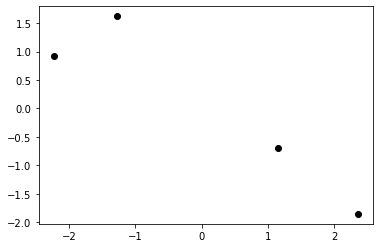

In [15]:
plt.plot(dataset_final[0],dataset_final[1], 'o', color='black')

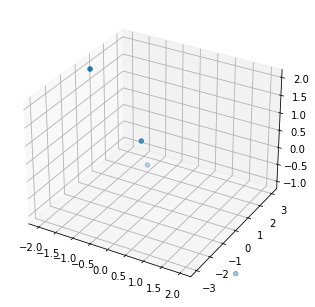

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs=x[:,0], ys=x[:,1], zs=x[:,2], zdir='x')

# PCA on Iris with Sickit-Learn


In [ ]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

X = sklearn.datasets.load_iris().data
mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)

nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])